In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# Set professional plotting style
rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.grid": True,
    "grid.alpha": 0.4,
    "figure.figsize": (8,5),
    "lines.linewidth": 2,
})

# Lin-COSEBI Basis Functions — Symbolic Construction and Visualization

This notebook constructs the Lin-COSEBI (linear COSEBIs) basis functions symbolically using SymPy, maps them from the standard x ∈ [-1,1] domain to a θ ∈ [θ_min, θ_max] interval, and visualizes the first n basis functions numerically.

- Implements Gram–Schmidt to produce an orthonormal polynomial basis on x ∈ [-1,1] and substitutes the linear map x = 2(θ−θ_min)/(θ_max−θ_min) − 1 to obtain θ-domain basis functions (cell 2).
- Shows example usage with concrete θ bounds and n_max (cell 3).
- Evaluates the symbolic expressions numerically with NumPy and plots the basis functions with Matplotlib (cell 4).

Usage
- Modify theta_min_val, theta_max_val and n_max in the example cell to explore different intervals and numbers of modes.
- Run cells in order: imports & style (cell 0) → basis constructor (cell 2) → example parameters & symbolic output (cell 3) → numeric evaluation & plotting (cell 4).

Dependencies
- sympy, numpy, matplotlib (already imported in cell 0).

In [34]:
def cosebi_basis_symbolic(n_max, theta_min, theta_max):
    """
    Construct symbolic coefficients for the first n_max Lin-COSEBI basis functions
    on [theta_min, theta_max].
    """
    theta = sp.Symbol('theta', real=True)
    x = sp.Symbol('x', real=True)

    # Mapping between θ and x
    theta_to_x = (2 * (theta - theta_min) / (theta_max - theta_min)) - 1

    # Build orthonormal polynomials on x ∈ [-1,1]
    monomials = [x**i for i in range(n_max)]
    basis_x = []

    for i, p in enumerate(monomials):
        for prev in basis_x:
            num = sp.integrate(p * prev, (x, -1, 1))
            den = sp.integrate(prev * prev, (x, -1, 1))
            p = sp.simplify(p - num/den * prev)
        norm = sp.sqrt(sp.integrate(p**2, (x, -1, 1)))
        p = sp.simplify(p / norm)
        basis_x.append(p)

    # Convert to θ-domain
    basis_theta = []
    for n, p in enumerate(basis_x, start=1):
        poly_theta = sp.expand(p.subs(x, theta_to_x))
        basis_theta.append((n, poly_theta))

    return basis_theta

In [40]:
# Example parameters
theta_min_val = 1.0
theta_max_val = 200.0
n_max = 15

theta_min, theta_max = sp.symbols('theta_min theta_max', positive=True)
basis = cosebi_basis_symbolic(n_max, theta_min, theta_max)

for n, p in basis:
    print(f"T_{n}(θ) = {p}\n")

T_1(θ) = sqrt(2)/2

T_2(θ) = sqrt(6)*theta/(theta_max - theta_min) - sqrt(6)*theta_min/(theta_max - theta_min) - sqrt(6)/2

T_3(θ) = 12*sqrt(10)*theta**2/(4*theta_max**2 - 8*theta_max*theta_min + 4*theta_min**2) - 24*sqrt(10)*theta*theta_min/(4*theta_max**2 - 8*theta_max*theta_min + 4*theta_min**2) - 3*sqrt(10)*theta/(theta_max - theta_min) + 12*sqrt(10)*theta_min**2/(4*theta_max**2 - 8*theta_max*theta_min + 4*theta_min**2) + 3*sqrt(10)*theta_min/(theta_max - theta_min) + sqrt(10)/2

T_4(θ) = 20*sqrt(14)*theta**3/(2*theta_max**3 - 6*theta_max**2*theta_min + 6*theta_max*theta_min**2 - 2*theta_min**3) - 60*sqrt(14)*theta**2*theta_min/(2*theta_max**3 - 6*theta_max**2*theta_min + 6*theta_max*theta_min**2 - 2*theta_min**3) - 20*sqrt(14)*theta**2/(4*theta_max**2 - 8*theta_max*theta_min + 4*theta_min**2) - 10*sqrt(14)*theta**2/(theta_max**2 - 2*theta_max*theta_min + theta_min**2) + 60*sqrt(14)*theta*theta_min**2/(2*theta_max**3 - 6*theta_max**2*theta_min + 6*theta_max*theta_min**2 - 2*theta_m

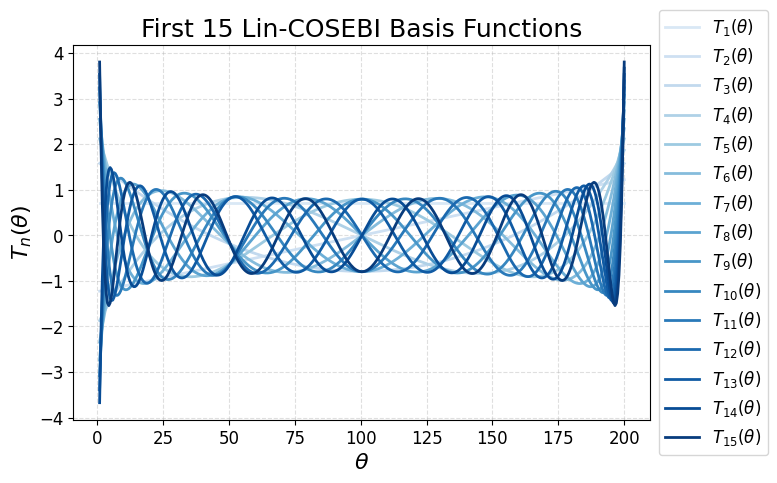

In [41]:
# theta grid
theta_vals = np.linspace(theta_min_val, theta_max_val, 400)
theta_sym = sp.Symbol('theta', real=True)

cmap = plt.cm.Blues
colors = cmap(np.linspace(0.15, 0.95, len(basis)))

# Plot
fig, ax = plt.subplots()

for (n, expr), c in zip(basis, colors):
    expr_num = expr.subs({theta_min: theta_min_val, theta_max: theta_max_val})
    f = sp.lambdify(theta_sym, expr_num, 'numpy')
    
    y_vals = f(theta_vals)
    y_vals = np.broadcast_to(np.ravel(y_vals), theta_vals.shape)
    
    ax.plot(theta_vals, y_vals, label=f"$T_{{{n}}}(\\theta)$", color=c)

# Labels and title
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$T_{n}(\theta)$")
ax.set_title(f"First {n_max} Lin-COSEBI Basis Functions")

# Legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

